In [1]:
from __future__ import print_function
import keras, pickle
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
infile = open('../data/data8.pickle','rb')
new_dict = pickle.load(infile)
y_train = new_dict['y_train']
y_test = new_dict['y_test']
x_train = new_dict['x_train'][:,0,:,:]
x_test = new_dict['x_test'][:,0,:,:]
y_train

array([37, 27, 38, ..., 11, 14, 30])

In [3]:
batch_size = 100
epochs = 4
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
num_chanels = 1
num_classes = len(set(y_train))

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(f"We have data prepared for backend [{keras.backend.backend()}]")
print(input_shape)

We have data prepared for backend [tensorflow]
(32, 32, 1)


In [5]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices, like get_dummies on pandas
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(input_shape)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
loss_function = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 86989 samples, validate on 12630 samples
Epoch 1/4
86989/86989 [==============================] - 139s 2ms/step - loss: 0.6283 - accuracy: 0.8271 - val_loss: 0.1677 - val_accuracy: 0.9547
Epoch 2/4
86989/86989 [==============================] - 138s 2ms/step - loss: 0.1314 - accuracy: 0.9618 - val_loss: 0.1601 - val_accuracy: 0.9622
Epoch 3/4
86989/86989 [==============================] - 132s 2ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.1270 - val_accuracy: 0.9689
Epoch 4/4
86989/86989 [==============================] - 132s 2ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.1703 - val_accuracy: 0.9641


In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17033783517171786
Test accuracy: 0.9640538692474365


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: 'acc'

[5.2682441e-23 6.5446346e-25 7.5761278e-21 1.1678178e-21 1.8983756e-23
 5.0318118e-22 6.6316110e-26 1.0551666e-24 6.1589226e-22 2.9285001e-21
 3.1035978e-20 6.0399120e-15 4.7156752e-22 2.1704906e-20 2.4703258e-23
 1.3118313e-21 6.1762496e-26 1.4935918e-23 4.5665448e-15 1.3061258e-18
 1.3428935e-11 3.3469662e-21 1.4464821e-12 2.9130662e-15 3.4262955e-15
 1.0000000e+00 5.9579425e-15 2.1139177e-11 4.7420266e-16 6.7475254e-15
 1.0989741e-12 2.6637978e-20 4.5329177e-19 1.5038916e-19 1.3870112e-17
 4.9696341e-18 1.4469966e-18 1.5006244e-20 1.1775055e-16 1.6989925e-18
 4.5305597e-22 4.3285896e-20 1.6076679e-23]
25


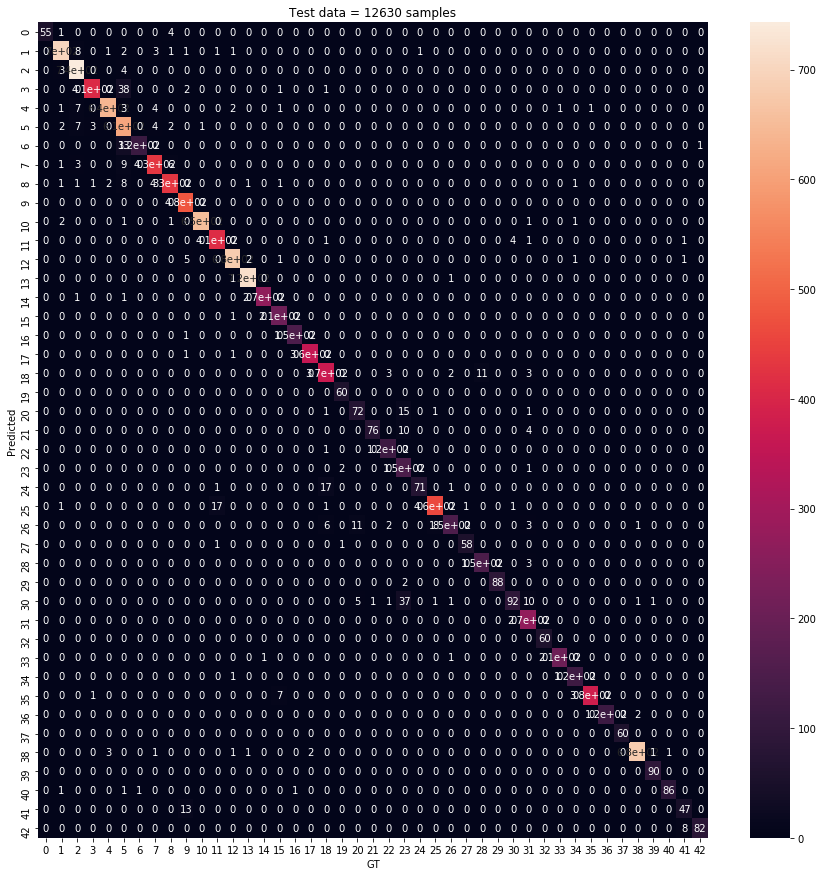

In [18]:
# Plot confusion matrix to have a more detailed view of cross-class missclassifications
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

## Use argmax to project output probabilites as class index label
proba = model.predict(x_test)
print(proba[0])
y_pred = np.argmax(proba, axis=1)
print(y_pred[0])
y_t = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_pred)

figure(figsize=(15,15))
sns.heatmap(cm, annot=True)
plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

In [22]:
#model.save("data/model_train.h5")
model.save_weights('../data/model/model_trained_weights.h5')
